##### Copyright &copy; 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TFX – tf.Transorm (Video)
This notebook demonstrates how to use tf.Transform in your TFX pipeline for video datasets. For this, we will be using the moving MNIST dataset.

![alt text](http://www.cs.toronto.edu/~nitish/unsupervised_video/images/000000.gif)

## Setup
First, we install the necessary packages, download data, import modules and set up paths.

In [ ]:
#!pip install tfx

In [ ]:
#!pip install -q git+https://github.com/tensorflow/docs
#!pip install apache-beam

## Did you restart the runtime?

If you are using Google Colab, the first time that you run the cell above, you must restart the runtime (Runtime > Restart runtime ...). This is because of the way that Colab loads packages.

### Import packages
We import necessary packages, including standard TFX component classes.

In [1]:
import os
import tempfile
import urllib

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
keras = tf.keras
K = keras.backend

import apache_beam as beam

import tensorflow_data_validation as tfdv
import tensorflow_datasets as tfds

import tfx


from tfx.components.example_gen.import_example_gen.component import ImportExampleGen
from tfx.components.example_validator.component import ExampleValidator
from tfx.components.schema_gen.component import SchemaGen
from tfx.components.statistics_gen.component import StatisticsGen
from tfx.components.transform.component import Transform

from tfx.orchestration.experimental.interactive.interactive_context import InteractiveContext

from tfx.proto import example_gen_pb2
from tensorflow_metadata.proto.v0 import schema_pb2

Check the versions

In [2]:
print('TensorFlow version: {}'.format(tf.__version__))
print('TFX version: {}'.format(tfx.__version__))

TensorFlow version: 2.5.0
TFX version: 1.0.0


### Download example data
We download the sample dataset for use in our TFX pipeline. We use TFDS to load the *rock_paper_scissors* dataset

In [3]:
test_dataset, dataset_info = tfds.load(name="moving_mnist",
                               split="test",
                               with_info=True)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))


Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))


Instructions for updating:
Use fn_output_signature instead


Instructions for updating:
Use fn_output_signature instead


In [4]:
dataset_info

tfds.core.DatasetInfo(
    name='moving_mnist',
    version=1.0.0,
    description='Moving variant of MNIST database of handwritten digits. This is the
data used by the authors for reporting model performance. See
`tfds.video.moving_mnist.image_as_moving_sequence`
for generating training/validation data from the MNIST dataset.
',
    homepage='http://www.cs.toronto.edu/~nitish/unsupervised_video/',
    features=FeaturesDict({
        'image_sequence': Video(Image(shape=(64, 64, 1), dtype=tf.uint8)),
    }),
    total_num_examples=10000,
    splits={
        'test': 10000,
    },
    supervised_keys=None,
    citation="""@article{DBLP:journals/corr/SrivastavaMS15,
      author    = {Nitish Srivastava and
                   Elman Mansimov and
                   Ruslan Salakhutdinov},
      title     = {Unsupervised Learning of Video Representations using LSTMs},
      journal   = {CoRR},
      volume    = {abs/1502.04681},
      year      = {2015},
      url       = {http://arxiv.org/abs

In [5]:
dataset_info.features['image_sequence']

Video(Image(shape=(64, 64, 1), dtype=tf.uint8))

In [6]:
import imageio
from tensorflow_docs.vis import embed

def to_gif(images):
  converted_images = np.clip(images * 255, 0, 255).astype(np.uint8)
  imageio.mimsave('./animation.gif', converted_images, fps=25)
  return embed.embed_file('./animation.gif')

In [7]:
for features in test_dataset.shuffle(256).take(1):
  sample_video = features['image_sequence']
sample_video.shape

TensorShape([20, 64, 64, 1])

These represent the `NUM_FRAMES`, `HEIGHT`, `WIDTH`, `NUM_CHANNELS` respectively




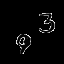

In [8]:
to_gif(sample_video)

In [9]:
import gc
del test_dataset
gc.collect()

1184

We make sure there are no images with a shape other than 300 x 300

## Running the pipeline interactively

In [10]:
context = InteractiveContext()

In [11]:
import IPython.display as display
import pprint 

HOME = os.path.expanduser('~')
examples_path = os.path.join(HOME, "tensorflow_datasets", "moving_mnist", str(dataset_info.version))

In [12]:
input_config = example_gen_pb2.Input(splits=[
    example_gen_pb2.Input.Split(name='test', pattern='moving_mnist-test*')])
example_gen = ImportExampleGen(input_base=examples_path, input_config=input_config)

context.run(example_gen)

ExecutionResult(
    component_id: ImportExampleGen
    execution_id: 1
    outputs:
        examples: Channel(
            type_name: Examples
            artifacts: [Artifact(artifact: id: 1
        type_id: 5
        uri: "C:\\Users\\chris\\AppData\\Local\\Temp\\tfx-interactive-2021-08-18T13_55_30.495700-6qzip8xm\\ImportExampleGen\\examples\\1"
        properties {
          key: "split_names"
          value {
            string_value: "[\"train\", \"eval\"]"
          }
        }
        custom_properties {
          key: "input_fingerprint"
          value {
            string_value: "split:test,num_files:1,total_bytes:96311357,xor_checksum:1629303334,sum_checksum:1629303334"
          }
        }
        custom_properties {
          key: "payload_format"
          value {
            string_value: "FORMAT_TF_EXAMPLE"
          }
        }
        custom_properties {
          key: "span"
          value {
            int_value: 0
          }
        }
        custom_properties {
          key: "state"
          value {
            string_value: "published"
          }
        }
        custom_properties {
          key: "tfx_version"
          value {
            string_value: "1.0.0"
          }
        }
        state: LIVE
        , artifact_type: id: 5
        name: "Examples"
        properties {
          key: "span"
          value: INT
        }
        properties {
          key: "split_names"
          value: STRING
        }
        properties {
          key: "version"
          value: INT
        }
        )]
            additional_properties: {}
            additional_custom_properties: {}
        ))

In [13]:
# Computes statistics over data for visualization and example validation.
statistics_gen = StatisticsGen(
    examples=example_gen.outputs['examples'])
context.run(statistics_gen)

ExecutionResult(
    component_id: StatisticsGen
    execution_id: 2
    outputs:
        statistics: Channel(
            type_name: ExampleStatistics
            artifacts: [Artifact(artifact: id: 2
        type_id: 7
        uri: "C:\\Users\\chris\\AppData\\Local\\Temp\\tfx-interactive-2021-08-18T13_55_30.495700-6qzip8xm\\StatisticsGen\\statistics\\2"
        properties {
          key: "split_names"
          value {
            string_value: "[\"train\", \"eval\"]"
          }
        }
        custom_properties {
          key: "name"
          value {
            string_value: "statistics"
          }
        }
        custom_properties {
          key: "producer_component"
          value {
            string_value: "StatisticsGen"
          }
        }
        custom_properties {
          key: "state"
          value {
            string_value: "published"
          }
        }
        custom_properties {
          key: "tfx_version"
          value {
            string_value: "1.0.0"
          }
        }
        state: LIVE
        , artifact_type: id: 7
        name: "ExampleStatistics"
        properties {
          key: "span"
          value: INT
        }
        properties {
          key: "split_names"
          value: STRING
        }
        )]
            additional_properties: {}
            additional_custom_properties: {}
        ))

In [14]:
# Generates schema based on statistics files.
infer_schema = SchemaGen(statistics=statistics_gen.outputs['statistics'], infer_feature_shape=True)
context.run(infer_schema)

ExecutionResult(
    component_id: SchemaGen
    execution_id: 3
    outputs:
        schema: Channel(
            type_name: Schema
            artifacts: [Artifact(artifact: id: 3
        type_id: 9
        uri: "C:\\Users\\chris\\AppData\\Local\\Temp\\tfx-interactive-2021-08-18T13_55_30.495700-6qzip8xm\\SchemaGen\\schema\\3"
        custom_properties {
          key: "name"
          value {
            string_value: "schema"
          }
        }
        custom_properties {
          key: "producer_component"
          value {
            string_value: "SchemaGen"
          }
        }
        custom_properties {
          key: "state"
          value {
            string_value: "published"
          }
        }
        custom_properties {
          key: "tfx_version"
          value {
            string_value: "1.0.0"
          }
        }
        state: LIVE
        , artifact_type: id: 9
        name: "Schema"
        )]
            additional_properties: {}
            additional_custom_properties: {}
        ))

In [15]:
train_uri = infer_schema.outputs['schema'].get()[0].uri
schema_filename = os.path.join(train_uri, "schema.pbtxt")
schema = tfx.utils.io_utils.parse_pbtxt_file(file_name=schema_filename,
                                             message=schema_pb2.Schema())

In [16]:
tfdv.display_schema(schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'image_sequence',BYTES,required,,-


In [17]:
# Performs anomaly detection based on statistics and data schema.
validate_stats = ExampleValidator(
    statistics=statistics_gen.outputs['statistics'],
    schema=infer_schema.outputs['schema'])
context.run(validate_stats)

ExecutionResult(
    component_id: ExampleValidator
    execution_id: 4
    outputs:
        anomalies: Channel(
            type_name: ExampleAnomalies
            artifacts: [Artifact(artifact: id: 4
        type_id: 11
        uri: "C:\\Users\\chris\\AppData\\Local\\Temp\\tfx-interactive-2021-08-18T13_55_30.495700-6qzip8xm\\ExampleValidator\\anomalies\\4"
        properties {
          key: "split_names"
          value {
            string_value: "[\"train\", \"eval\"]"
          }
        }
        custom_properties {
          key: "name"
          value {
            string_value: "anomalies"
          }
        }
        custom_properties {
          key: "producer_component"
          value {
            string_value: "ExampleValidator"
          }
        }
        custom_properties {
          key: "state"
          value {
            string_value: "published"
          }
        }
        custom_properties {
          key: "tfx_version"
          value {
            string_value: "1.0.0"
          }
        }
        state: LIVE
        , artifact_type: id: 11
        name: "ExampleAnomalies"
        properties {
          key: "span"
          value: INT
        }
        properties {
          key: "split_names"
          value: STRING
        }
        )]
            additional_properties: {}
            additional_custom_properties: {}
        ))

In [18]:
# Set up paths.
_transform_module_file = 'moving_mnist_transform.py'

In [19]:
%%writefile {_transform_module_file}

import tensorflow_transform as tft
import tensorflow as tf
# import tensorflow_io as tfio


_VIDEO_KEY = 'image_sequence'

def _transformed_name(name):
  return name + '_xf'


def decode_frame(serialized_image):
  """Decodes a single frame."""
  return tf.image.decode_png(
      serialized_image,
      channels=1,
  )

def decode_video(video_str):
  """Decodes all individual frames of the video."""
  flattened = tf.reshape(video_str, [-1])

  images = tf.compat.v2.map_fn(
      decode_frame,
      flattened,
      back_prop=False,
      dtype=tf.uint8)
  images = tf.reshape(images, [20, 64, 64, 1])
  images = tf.cast(images, tf.float32)

  return images


def preprocessing_fn(inputs):
  """tf.transform's callback function for preprocessing inputs.
  Args:
    inputs: map from feature keys to raw not-yet-transformed features.
  Returns:
    Map from string feature key to transformed feature operations.
  """
  with tf.device('/device:cpu:0'):
    outputs = {
        _transformed_name(_VIDEO_KEY):
            tf.compat.v2.map_fn(
                decode_video,
                inputs[_VIDEO_KEY],
                dtype=tf.float32)
    }
  return outputs

Writing moving_mnist_transform.py


In [20]:
# Performs transformations and feature engineering in training and serving.
transform = Transform(
    examples=example_gen.outputs['examples'],
    schema=infer_schema.outputs['schema'],
    module_file=os.path.abspath(_transform_module_file))
context.run(transform)

Instructions for updating:
Use ref() instead.


Instructions for updating:
Use ref() instead.


RuntimeError: tensorflow.python.framework.errors_impl.NotFoundError: Failed to create a NewWriteableFile: C:\Users\chris\AppData\Local\Temp\tfx-interactive-2021-08-18T13_55_30.495700-6qzip8xm\Transform\transform_graph\5\.temp_path\tftransform_tmp\71096a1fa5144b7aa230a9c9cfcf30a5\variables\variables_temp/part-00000-of-00001.data-00000-of-00001.tempstate17469215695989881509 : The system cannot find the path specified.
; No such process [Op:SaveV2] [while running 'Analyze/CreateSavedModel[tf_v2_only]/CreateSavedModel']

In [ ]:
transform.outputs

In [ ]:
train_uri = transform.outputs['transform_graph'].get()[0].uri
os.listdir(train_uri)

In [ ]:
# Get the URI of the output artifact representing the transformed examples, which is a directory
train_uri = os.path.join(transform.outputs['transformed_examples'].get()[0].uri, 'Split-train')

# Get the list of files in this directory (all compressed TFRecord files)
tfrecord_filenames = [os.path.join(train_uri, name)
                      for name in os.listdir(train_uri)]

# Create a `TFRecordDataset` to read these files
dataset = tf.data.TFRecordDataset(tfrecord_filenames, compression_type="GZIP")

In [ ]:
from tfx_bsl.coders import example_coder

for index, tfrecord in enumerate(dataset.take(1)):
  # Decode example
  example = example_coder.ExampleToNumpyDict(tfrecord.numpy())
  # Reformat data 
  video = example["image_sequence_xf"].reshape(20, 64, 64, 1)

In [ ]:
to_gif(video)